<a href="https://colab.research.google.com/github/nguyetvo/CBD-Fruits360/blob/master/Nguyet_Vo_Fruits360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fruit Classifier**
Data: https://www.kaggle.com/moltean/fruits 

**Steps Involed are:**

Step 1:Importing all required modules

Step 2:Visualizing Dataset

Step 3:Loading the data.

Step 4:Preprocess the data - Data Generation - Train - Test

Step 5:Create CNN to classify fruits.

Step 6: Compile the Model

Step 7: Train the Model

Step 8: Model Save

Step 9: Model Evaluation

Step 10: Prediction

# Step 1: Importing all required modules

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"nguyetvo1010","key":"b4358117b762b9b20a9246f5c6c51c40"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d moltean/fruits

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls

 cnn_fruit_hist.json	  fruits.zip	     nguyet_fruits_classify.h5
 cnn_fruit_weights.hdf5  'kaggle (1).json'   sample_data
 fruits-360		  kaggle.json	     tomato.jpeg


In [6]:
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating: fruits-360/Training/Tomato 3/129_100.jpg

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
%matplotlib inline
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from keras.preprocessing import image                  
from tqdm import tqdm
from IPython.display import display
from PIL import Image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

import matplotlib.pyplot as plt
from glob import glob
import os
from os import listdir
from os.path import isfile, join
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 

Using TensorFlow backend.


In [8]:
train_files = "/content/fruits-360/Training/"
test_files = "/content/fruits-360/Test/"

# Step2: Visualizing Images

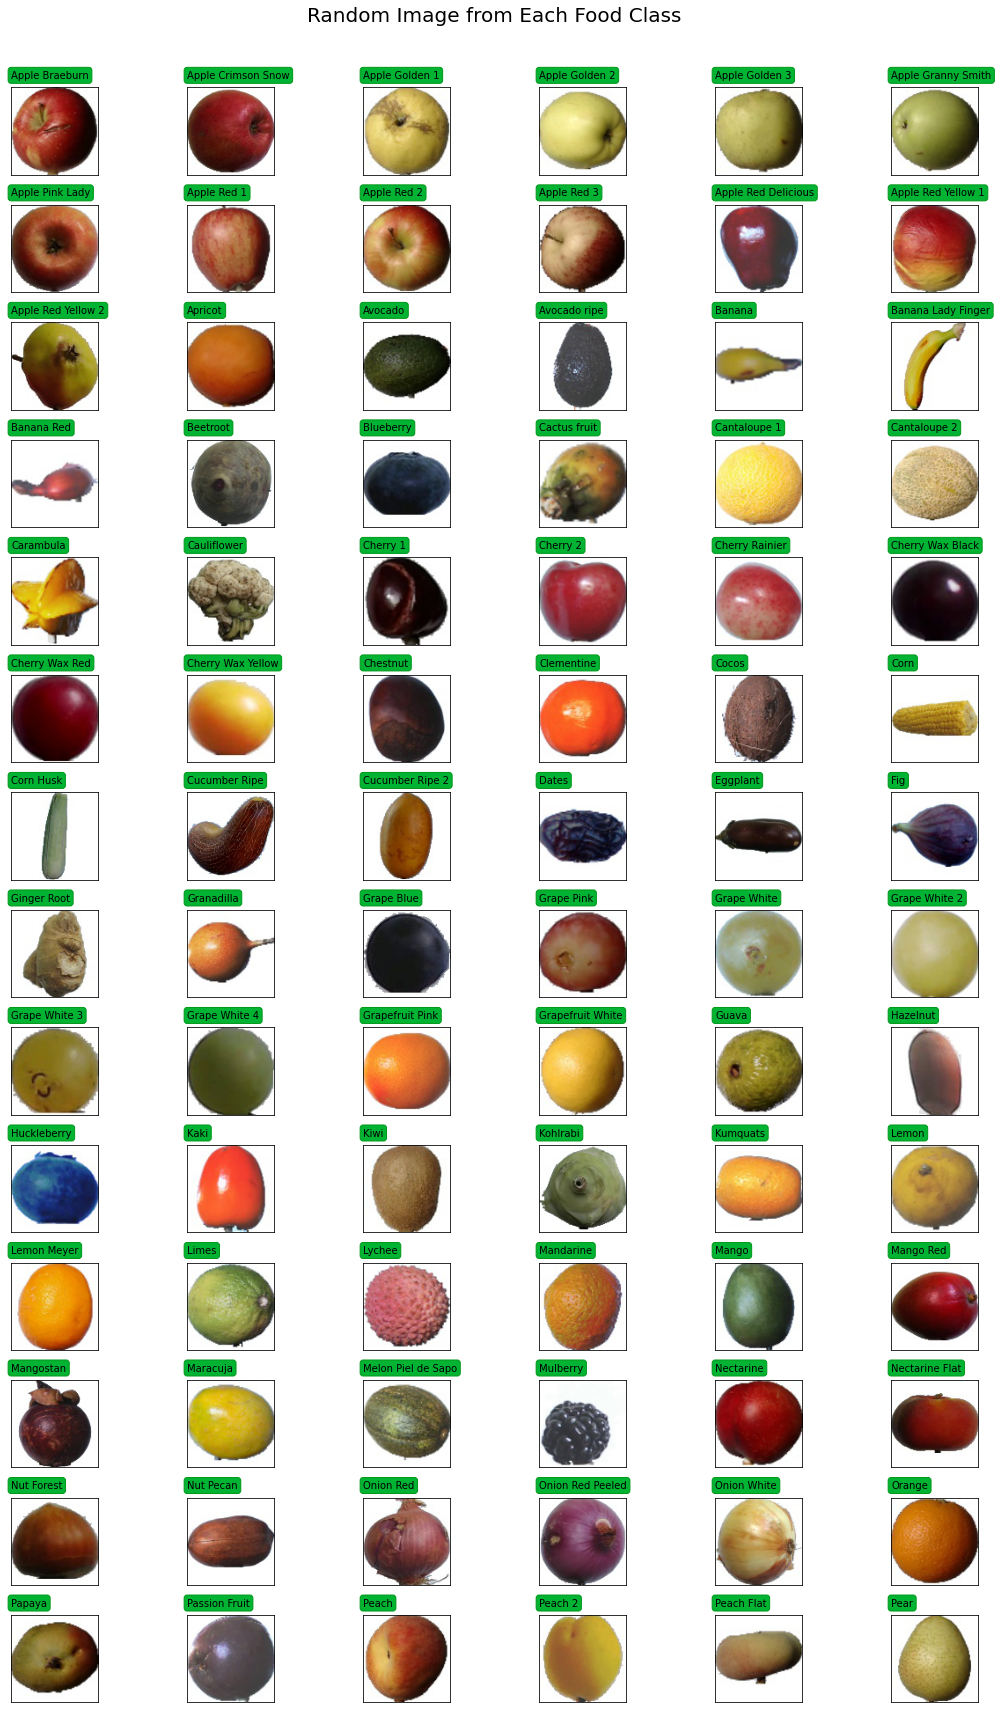

In [9]:
root_dir = '/content/fruits-360/Training'
rows = 14
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Random Image from Each Food Class', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
        except:
            break
        all_files = os.listdir(os.path.join(root_dir, food_dir))
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(root_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

(-0.5, 99.5, 99.5, -0.5)

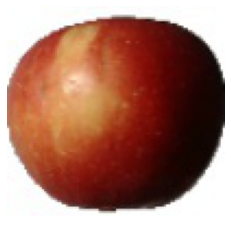

In [10]:
img = load_img(train_files + "Apple Braeburn/0_100.jpg")

plt.imshow(img)
plt.axis("off")

In [11]:
x = img_to_array(img)

print(x.shape) #x=100, y=100, RBG=3

(100, 100, 3)


# Step 3: Loading the data

In [12]:
# define function to load train and test datasets
def load_dataset(path):
    data = load_files(path)
    fruit_files = np.array(data['filenames'])
    fruit_targets = np_utils.to_categorical(np.array(data['target']))
    return fruit_files, fruit_targets

# load train and test datasets
train_files, train_targets = load_dataset('/content/fruits-360/Training')
test_files, test_targets = load_dataset('/content/fruits-360/Test')

# load list of fruits names
fruit_names = [item[9:] for item in sorted(glob("/content/fruits-360/Training/*"))]

# print statistics about the dataset
print('There are %d total fruit categories.' % len(fruit_names))
print('There are %s total fruit images.\n' % len(np.hstack([train_files, test_files])))
print('There are %d training fruit images.' % len(train_files))
print('There are %d test fruit images.'% len(test_files))
print(train_files[:5])

There are 131 total fruit categories.
There are 90380 total fruit images.

There are 67692 training fruit images.
There are 22688 test fruit images.
['/content/fruits-360/Training/Cherry 2/r_263_100.jpg'
 '/content/fruits-360/Training/Nut Pecan/73_100.jpg'
 '/content/fruits-360/Training/Melon Piel de Sapo/r_45_100.jpg'
 '/content/fruits-360/Training/Redcurrant/120_100.jpg'
 '/content/fruits-360/Training/Strawberry Wedge/r_176_100.jpg']


In [13]:
className = glob("/content/fruits-360/Training/*")

className

['/content/fruits-360/Training/Onion Red',
 '/content/fruits-360/Training/Onion White',
 '/content/fruits-360/Training/Guava',
 '/content/fruits-360/Training/Cocos',
 '/content/fruits-360/Training/Dates',
 '/content/fruits-360/Training/Cucumber Ripe',
 '/content/fruits-360/Training/Pepper Red',
 '/content/fruits-360/Training/Apple Golden 1',
 '/content/fruits-360/Training/Pear Kaiser',
 '/content/fruits-360/Training/Potato White',
 '/content/fruits-360/Training/Limes',
 '/content/fruits-360/Training/Cherry Wax Yellow',
 '/content/fruits-360/Training/Cauliflower',
 '/content/fruits-360/Training/Raspberry',
 '/content/fruits-360/Training/Apple Red Yellow 1',
 '/content/fruits-360/Training/Pitahaya Red',
 '/content/fruits-360/Training/Rambutan',
 '/content/fruits-360/Training/Pear Red',
 '/content/fruits-360/Training/Pomegranate',
 '/content/fruits-360/Training/Tomato Yellow',
 '/content/fruits-360/Training/Banana',
 '/content/fruits-360/Training/Quince',
 '/content/fruits-360/Training/Ch

In [14]:
numberOfClass = len(className)

print("numberOfClass: ",numberOfClass)

numberOfClass:  131


# Step 5: Design the CNN to classify fruits.

In [15]:
model = Sequential()

# feature extraction
model.add(Conv2D(32,(3,3),input_shape=x.shape)) # Convolution Layer  -32=number of filter, (3,3)=size of filter
model.add(Activation("relu")) # Activation Function
model.add(MaxPooling2D()) # Pooling Layer (default size: (2,2))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

#fully connected
model.add(Flatten()) # Flatten
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5)) # dropout
model.add(Dense(numberOfClass)) #output layer
model.add(Activation("softmax")) # softmax function

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)       

# Step 6: Compile the Model

In [16]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

# Step 4: Pre-process the Data - Data Generation - Train - Test

In [17]:
batch_size = 32

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3, # it turns image
                                   horizontal_flip = True, #horizontal_flip truns image frame to right or left
                                   zoom_range = 0.3) # zoom in, zoom out


test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
train_genetor = train_datagen.flow_from_directory(
    '/content/fruits-360/Training', 
    target_size=x.shape[:2],
    batch_size = batch_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=True) 


test_genetor = test_datagen.flow_from_directory(
    '/content/fruits-360/Test', 
    target_size=x.shape[:2],
    batch_size = batch_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=True)



Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [20]:
#train_datagen = ImageDataGenerator(
#        rescale=1./255,
#        shear_range=0,
#        zoom_range=0,
#        horizontal_flip=False,
#        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#        height_shift_range=0.1)  # randomly shift images vertically (fraction of total height))

#test_datagen = ImageDataGenerator(rescale=1./255)  

#train_generator = train_datagen.flow_from_directory(
#        '/home/datasets/cifar10/train',
#        target_size=(32, 32),
#        batch_size=32,
#        shuffle=False)

#validation_generator = test_datagen.flow_from_directory(
#        '/home/datasets/cifar10/test',
#        target_size=(32, 32),
#        batch_size=32,
#        shuffle=False)

# Step 7: Train the Model

In [21]:
hist = model.fit_generator(
    generator = train_genetor,
    steps_per_epoch=1600 // batch_size,
    epochs=100,
    validation_data = test_genetor, 
    validation_steps= 800//batch_size)

Epoch 1/100
50/50 [==============================] - 7s 139ms/step - loss: 4.7121 - accuracy: 0.0350 - val_loss: 4.1841 - val_accuracy: 0.0538
Epoch 2/100
50/50 [==============================] - 6s 114ms/step - loss: 3.8866 - accuracy: 0.1119 - val_loss: 3.1560 - val_accuracy: 0.1988
Epoch 3/100
50/50 [==============================] - 6s 113ms/step - loss: 3.0501 - accuracy: 0.2106 - val_loss: 2.2251 - val_accuracy: 0.4313
Epoch 4/100
50/50 [==============================] - 6s 115ms/step - loss: 2.4809 - accuracy: 0.3044 - val_loss: 1.9991 - val_accuracy: 0.4112
Epoch 5/100
50/50 [==============================] - 6s 116ms/step - loss: 2.0647 - accuracy: 0.3938 - val_loss: 1.1713 - val_accuracy: 0.6600
Epoch 6/100
50/50 [==============================] - 6s 115ms/step - loss: 1.6679 - accuracy: 0.4931 - val_loss: 1.1931 - val_accuracy: 0.6562
Epoch 7/100
50/50 [==============================] - 6s 115ms/step - loss: 1.5594 - accuracy: 0.5400 - val_loss: 0.8104 - val_accuracy: 0.7287

In [22]:
#model.save_weights("cnn_fruit_weights.hd5")

# Step 8:  Save Model

In [23]:
model.save('nguyet_fruits_classify.h5')

# Step 9: Model Evaluation

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


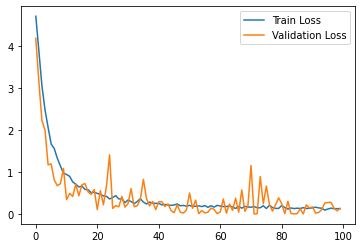

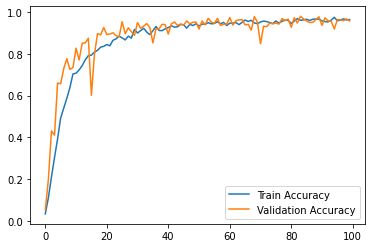

In [25]:
print(hist.history.keys())

plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

# Step 10: Prediction

In [27]:
def no_warn():
    import warnings

    def fxn():
        warnings.warn("deprecated", DeprecationWarning)

    with warnings.catch_warnings(record=True) as w:
        # Cause all warnings to always be triggered.
        warnings.simplefilter("always")
        # Trigger a warning.
        fxn()
        # Verify some things
        assert len(w) == 1
        assert issubclass(w[-1].category, DeprecationWarning)
        assert "deprecated" in str(w[-1].message)

In [30]:
from keras.models import load_model
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
no_warn()

In [31]:
#modell= load_model('nguyet_fruits_classify.h5')
nguyet_model = tf.keras.models.load_model('nguyet_fruits_classify.h5')
no_warn()

In [32]:
nguyet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)       

In [50]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
   creating: fruits/test_images/
  inflating: __MACOSX/fruits/._test_images  
  inflating: fruits/test_images/73_100.jpg  
  inflating: __MACOSX/fruits/test_images/._73_100.jpg  
  inflating: fruits/test_images/260_100.jpg  
  inflating: __MACOSX/fruits/test_images/._260_100.jpg  
  inflating: fruits/test_images/130_100.jpg  
  inflating: __MACOSX/fruits/test_images/._130_100.jpg  
  inflating: fruits/test_images/94_100.jpg  
  inflating: __MACOSX/fruits/test_images/._94_100.jpg  
  inflating: fruits/test_images/226_100.jpg  
  inflating: __MACOSX/fruits/test_images/._226_100.jpg  
  inflating: fruits/test_images/8_100.jpg  
  inflating: __MACOSX/fruits/test_images/._8_100.jpg  
  inflating: fruits/test_images/263_100.jpg  
  inflating: __MACOSX/fruits/test_images/._263_100.jpg  
  inflating: fruits/test_images/105_100.jpg  
  inflating: __MACOSX/fruits/test_images/._105_100.jpg  
  inflating: fruits/test_i

In [145]:
class Fruit:
    
    def __init__(self, img_dir = ''):
        self.img_dir = img_dir
        self.cnt = 0
        self.batch_holder = None
        self.model = load_model('nguyet_fruits_classify.h5')
        self.Label_dict = labels =  { 
            'Apple Braeburn':1, 
            'Apple Crimson Snow':2,
            'Apple Golden 1':3,
            'Apple Golden 2':4,
            'Apple Golden 3':5 ,
            'Apple Granny Smith':6,
            'Apple Pink Lady ':7,
            'Apple Red 1 ':8,
            'Apple Red 2 ':9,
            'Apple Red 3' :10,
            'Apple Red Delicious ':11,
            'Apple Red Yellow 1':12,
            'Apple Red Yellow 2':13,
            'Apricot':14,
            'Avocado':15,
            'Avocado ripe':16, 
            'Banana':17,
            'Banana Lady Finger':18,
            'Banana Red':19,
            'Beetroot':20,
            'Blueberry ':21,
            'Cactus fruit ':22,
            'Cantaloupe 1 ':23,
            'Cantaloupe 2 ':24,
            'Carambula ':25,
            'Cauliflower ':26,
            'Cherry 1 ':27,
            'Cherry 2 ':28,
            'Cherry Rainier' :29,
            'Cherry Wax Black ':30,
            'Cherry Wax Red ':31,
            'Cherry Wax Yellow ':32,
            'Chestnut ':33,
            'Clementine ':34,
            'Cocos ':35,
            'Corn ':36,
            'Corn Husk ':37,
            'Cucumber Ripe ':38,
            'Cucumber Ripe 2 ':39,
            'Dates ':40,
           'Eggplant ':41,
            'Fig ':42,
            'Ginger Root ':43,
            'Granadilla':44,
            'Grape Blue ':45,
            'Grape Pink ':46,
            'Grape White ':47,
            'Grape White 2 ':48,
           'Grape White 3 ':49,
           'Grape White 4 ':50,
            'Grapefruit Pink ':51,
            'Grapefruit White ':52,
            'Guava ':53,
            'Hazelnut ':54,
            'Huckleberry ':55,
            'Kaki ':56,
            'Kiwi ':57,
            'Kohlrabi ':58,
            'Kumquats ':59,
            'Lemon':60,
            'Lemon Meyer ':61,
            'Limes' :62,
            'Lychee ':63,
            'Mandarine ':64,
            'Mango ':65,
            'Mango Red':66,
            'Mangostan ':67,
            'Maracuja ':68,
            'Melon Piel de Sapo':69, 
            'Mulberry ':70,
            'Nectarine ':71,
            'Nectarine Flat ':72,
            'Nut Forest ':73,
            'Nut Pecan ':74,
            'Onion Red ':75,
            'Onion Red Peeled ':76,
            'Onion White ':77,
            'Orange ':78,
            'Papaya ':79,
            'Passion Fruit ':80,
            'Peach ':81,
            'Peach 2 ':82,
            'Peach Flat ':83,
            'Pear ':84,
            'Pear 2 ':85,
            'Pear Abate ':86,
            'Pear Forelle ':87,
            'Pear Kaiser':88,
            'Pear Monster' :89,
            'Pear Red ':90,
            'Pear Stone ':91,
            'Pear Williams ':92,
            'Pepino ':93,
            'Pepper Green ':94,
            'Pepper Orange ':95,
            'Pepper Red ':96,
            'Pepper Yellow ':97,
            'Physalis ':98,
            'Physalis with Husk ':99,
            'Pineapple ':100,
            'Pineapple Mini ':101,
            'Pitahaya Red ':102,
            'Plum ':103,
            'Plum 2 ':104,
            'Plum 3 ':105,
            'Pomegranate ':106,
            'Pomelo Sweetie ':107,
            'Potato Red ':108,
            'Potato Red Washed ':109,
            'Potato Sweet ':110,
            'Potato White ':111,
            'Quince ':112,
            'Rambutan ':113,
            'Raspberry ':114,
            'Redcurrant ':115,
            'Salak ':116,
            'Strawberry ':117,
            'Strawberry Wedge ':118,
            'Tamarillo ':119,
            'Tangelo ':120,
            'Tomato 1 ':121,
            'Tomato 2 ':122,
            'Tomato 3 ':123,
            'Tomato 4 ':124,
            'Tomato Cherry Red ':125,
            'Tomato Heart ':126,
            'Tomato Maroon ':127,
            'Tomato Yellow ':128,
            'Tomato not Ripened ':129,
            'Walnut':130,
            'Watermelon':131       
    }
        self.label = list(self.Label_dict.keys())
    
    def read_images(self):
        self.cnt = len(os.listdir(self.img_dir))
        self.batch_holder = np.zeros((self.cnt, 100, 100, 3))
        for i,img in enumerate(os.listdir(self.img_dir)):
            img = image.load_img(os.path.join(self.img_dir,img), target_size=(100, 100))
            self.batch_holder[i, :] = img
        return self.batch_holder
    
    def predict(self):
        fig = plt.figure(figsize=(20, 20))
        for i,img in enumerate(self.batch_holder):
            fig.add_subplot(5, 5, i+1)
            result=self.model.predict(self.batch_holder)
            result_classes = result.argmax(axis=-1)
            plt.title(self.label[result_classes[i]])
            plt.tick_params(
                axis='both',        
                which='both',      
                bottom=False,      
                top=False,         
                labelbottom=False,
                labelleft=False)
            plt.imshow(img/256.)
        plt.show()

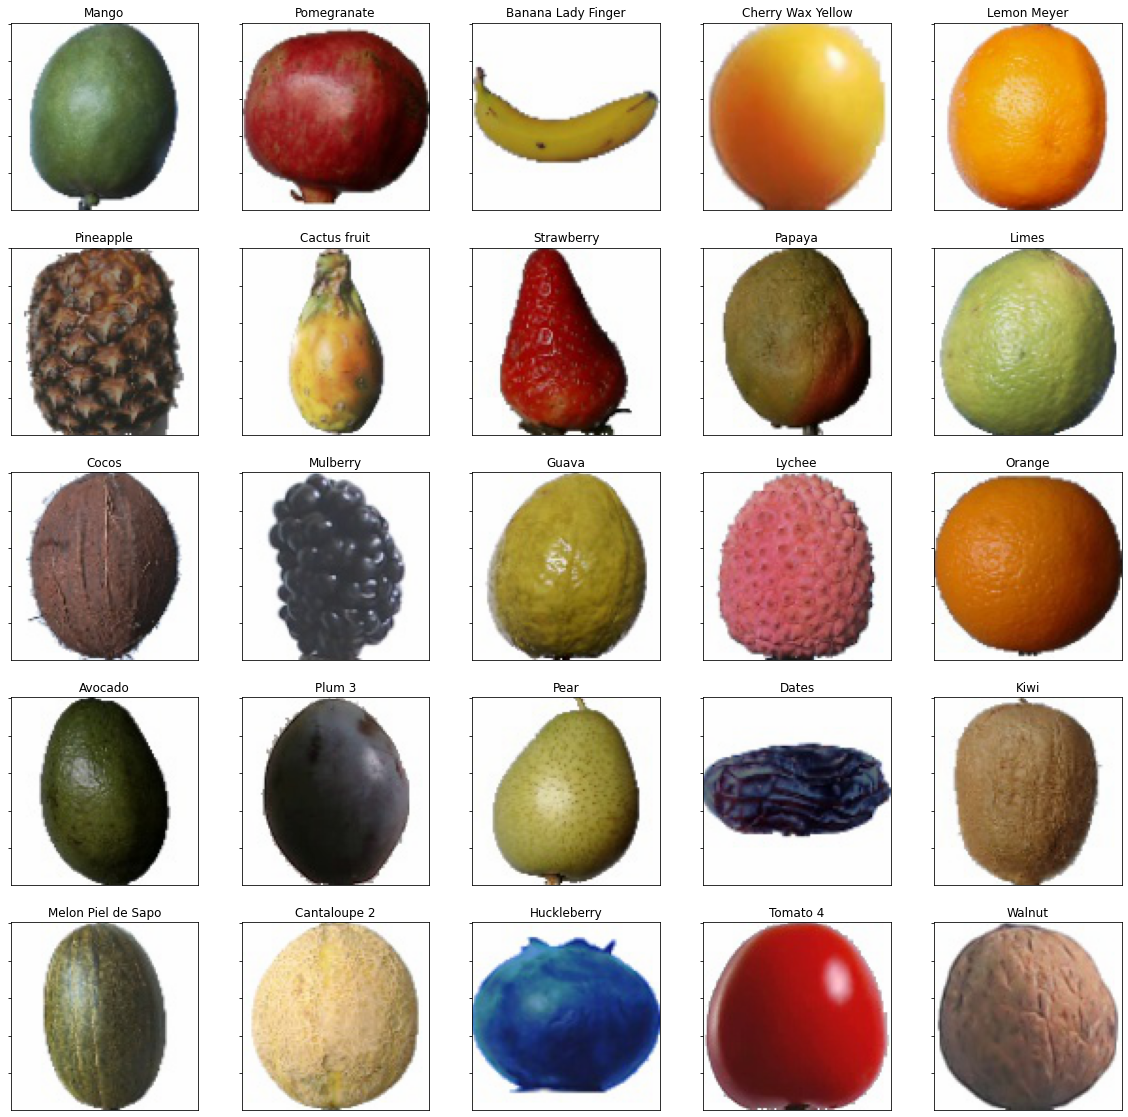

In [146]:
obj = Fruit('fruits//test_images//')
obj.read_images()
obj.predict()

In [129]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

nguyet_model1 = tf.keras.models.load_model('/content/nguyet_fruits_classify.h5')

In [130]:
import shutil # copy, move file
import os # miscellaneous operation system interfaces
import pathlib
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [137]:
from tensorflow.keras.preprocessing import image

img_path = '/content/fruits-360/Test/Banana/110_100.jpg'
img = image.load_img(img_path)
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array) # Preprocess the image
prediction = model.predict(preprocessed_img)

a = prediction[0].tolist()
print(round(max(a),4))
print(a.index(max(a)))
print(test_genetor.class_indices)

1.0
17
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Gr

In [138]:
class_name = {'Apple Braeburn':1, 
            'Apple Crimson Snow':2,
            'Apple Golden 1':3,
            'Apple Golden 2':4,
            'Apple Golden 3':5 ,
            'Apple Granny Smith':6,
            'Apple Pink Lady ':7,
            'Apple Red 1 ':8,
            'Apple Red 2 ':9,
            'Apple Red 3' :10,
            'Apple Red Delicious ':11,
            'Apple Red Yellow 1':12,
            'Apple Red Yellow 2':13,
            'Apricot':14,
            'Avocado':15,
            'Avocado ripe':16, 
            'Banana':17,
            'Banana Lady Finger':18,
            'Banana Red':19,
            'Beetroot':20,
            'Blueberry ':21,
            'Cactus fruit ':22,
            'Cantaloupe 1 ':23,
            'Cantaloupe 2 ':24,
            'Carambula ':25,
            'Cauliflower ':26,
            'Cherry 1 ':27,
            'Cherry 2 ':28,
            'Cherry Rainier' :29,
            'Cherry Wax Black ':30,
            'Cherry Wax Red ':31,
            'Cherry Wax Yellow ':32,
            'Chestnut ':33,
            'Clementine ':34,
            'Cocos ':35,
            'Corn ':36,
            'Corn Husk ':37,
            'Cucumber Ripe ':38,
            'Cucumber Ripe 2 ':39,
            'Dates ':40,
           'Eggplant ':41,
            'Fig ':42,
            'Ginger Root ':43,
            'Granadilla':44,
            'Grape Blue ':45,
            'Grape Pink ':46,
            'Grape White ':47,
            'Grape White 2 ':48,
           'Grape White 3 ':49,
           'Grape White 4 ':50,
            'Grapefruit Pink ':51,
            'Grapefruit White ':52,
            'Guava ':53,
            'Hazelnut ':54,
            'Huckleberry ':55,
            'Kaki ':56,
            'Kiwi ':57,
            'Kohlrabi ':58,
            'Kumquats ':59,
            'Lemon':60,
            'Lemon Meyer ':61,
            'Limes' :62,
            'Lychee ':63,
            'Mandarine ':64,
            'Mango ':65,
            'Mango Red':66,
            'Mangostan ':67,
            'Maracuja ':68,
            'Melon Piel de Sapo':69, 
            'Mulberry ':70,
            'Nectarine ':71,
            'Nectarine Flat ':72,
            'Nut Forest ':73,
            'Nut Pecan ':74,
            'Onion Red ':75,
            'Onion Red Peeled ':76,
            'Onion White ':77,
            'Orange ':78,
            'Papaya ':79,
            'Passion Fruit ':80,
            'Peach ':81,
            'Peach 2 ':82,
            'Peach Flat ':83,
            'Pear ':84,
            'Pear 2 ':85,
            'Pear Abate ':86,
            'Pear Forelle ':87,
            'Pear Kaiser':88,
            'Pear Monster' :89,
            'Pear Red ':90,
            'Pear Stone ':91,
            'Pear Williams ':92,
            'Pepino ':93,
            'Pepper Green ':94,
            'Pepper Orange ':95,
            'Pepper Red ':96,
            'Pepper Yellow ':97,
            'Physalis ':98,
            'Physalis with Husk ':99,
            'Pineapple ':100,
            'Pineapple Mini ':101,
            'Pitahaya Red ':102,
            'Plum ':103,
            'Plum 2 ':104,
            'Plum 3 ':105,
            'Pomegranate ':106,
            'Pomelo Sweetie ':107,
            'Potato Red ':108,
            'Potato Red Washed ':109,
            'Potato Sweet ':110,
            'Potato White ':111,
            'Quince ':112,
            'Rambutan ':113,
            'Raspberry ':114,
            'Redcurrant ':115,
            'Salak ':116,
            'Strawberry ':117,
            'Strawberry Wedge ':118,
            'Tamarillo ':119,
            'Tangelo ':120,
            'Tomato 1 ':121,
            'Tomato 2 ':122,
            'Tomato 3 ':123,
            'Tomato 4 ':124,
            'Tomato Cherry Red ':125,
            'Tomato Heart ':126,
            'Tomato Maroon ':127,
            'Tomato Yellow ':128,
            'Tomato not Ripened ':129,
            'Walnut':130,
            'Watermelon':131    }

In [139]:
index_to_label = dict((v,k) for k, v in class_name.items())
print(index_to_label)

{1: 'Apple Braeburn', 2: 'Apple Crimson Snow', 3: 'Apple Golden 1', 4: 'Apple Golden 2', 5: 'Apple Golden 3', 6: 'Apple Granny Smith', 7: 'Apple Pink Lady ', 8: 'Apple Red 1 ', 9: 'Apple Red 2 ', 10: 'Apple Red 3', 11: 'Apple Red Delicious ', 12: 'Apple Red Yellow 1', 13: 'Apple Red Yellow 2', 14: 'Apricot', 15: 'Avocado', 16: 'Avocado ripe', 17: 'Banana', 18: 'Banana Lady Finger', 19: 'Banana Red', 20: 'Beetroot', 21: 'Blueberry ', 22: 'Cactus fruit ', 23: 'Cantaloupe 1 ', 24: 'Cantaloupe 2 ', 25: 'Carambula ', 26: 'Cauliflower ', 27: 'Cherry 1 ', 28: 'Cherry 2 ', 29: 'Cherry Rainier', 30: 'Cherry Wax Black ', 31: 'Cherry Wax Red ', 32: 'Cherry Wax Yellow ', 33: 'Chestnut ', 34: 'Clementine ', 35: 'Cocos ', 36: 'Corn ', 37: 'Corn Husk ', 38: 'Cucumber Ripe ', 39: 'Cucumber Ripe 2 ', 40: 'Dates ', 41: 'Eggplant ', 42: 'Fig ', 43: 'Ginger Root ', 44: 'Granadilla', 45: 'Grape Blue ', 46: 'Grape Pink ', 47: 'Grape White ', 48: 'Grape White 2 ', 49: 'Grape White 3 ', 50: 'Grape White 4 ', 

In [140]:
name = index_to_label[index].split()
print(name[0])

Banana
